In [22]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [23]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2320  images to be resized.
2320  images resized.
가위 이미지 resize 완료!


In [24]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

2270  images to be resized.
2270  images resized.


In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

2270  images to be resized.
2270  images resized.


In [25]:
import numpy as np

def load_data(img_path, number_of_data=6792):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 6792 입니다.
x_train shape: (6792, 28, 28, 3)
y_train shape: (6792,)


라벨:  0


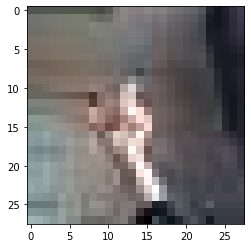

In [26]:
#한번 이미지를 불러 볼까요?
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [55]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

import tensorflow as tf
from tensorflow import keras
import numpy as np
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()


Model에 추가된 Layer 개수:  7
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_23 (Dense)             

In [56]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
# [[YOUR CODE]]

Epoch 1/10
213/213 [==============================] - 1s 4ms/step - loss: 6.5837 - accuracy: 0.4107
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 0.5735 - accuracy: 0.7503
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 0.3439 - accuracy: 0.8594
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2784 - accuracy: 0.8961
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 0.1658 - accuracy: 0.9385
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 0.1536 - accuracy: 0.9445
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 0.0885 - accuracy: 0.9689
Epoch 8/10
213/213 [==============================] - 1s 4ms/step - loss: 0.0761 - accuracy: 0.9737
Epoch 9/10
213/213 [==============================] - 1s 4ms/step - loss: 0.1848 - accuracy: 0.9383
Epoch 10/10
213/213 [==============================] - 1s 4ms/step - loss: 0.0729 - accuracy: 0.9743

In [29]:

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path)
print("x_test shape: {}".format(x_test.shape))
print("y_test  shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test  shape: (300,)


In [57]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.4485 - accuracy: 0.6733
test_loss: 1.4485381841659546 
test_accuracy: 0.6733333468437195


## 회고

1. 이미지 분류 모델을 성공적으로 만들어 트레이닝이 잘 수행되었습니다.
2. 오버 피팅을 피하기 위해 여러 팀원들의 데이터를 사용하였지만 한 사람의 데이터에서 같은 모양이 나오는 이미지까지는 분류하지 못하였습니다.
3. Test accuracy가 67%를 달성하였지만 많이 아쉬운 수치이고 파라미터를 수정하여 얻어내었습니다.

총평

데이터를 1200개 정도 트레이닝 시켰을때는 35% 정도 나왔고 2100개를 시켰을 때도 45%를 넘지 못하였습니다. 바로 6792개를 하였을 때는 시도에 따라 70%를 넘는 accuracy를 얻어 낼 수 있었고 데이터를 얼마나 트레이닝 시켜야하나에 대해 실감할 수 있었습니다.
처음에는 트레이닝 데이터에 사용된 팀원의 데이터를 테스트 데이터에 넣어 정확도가 90%이상 나오는 실수를 범하였지만 다시 본인의 손을 이용해 데이터를 생성하여 테스트를 돌렸습니다. 정확도가 너무 높게 나와도 의심해 볼 필요가 있다는 것을 알게 된거 같습니다.